In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Cargamos el dataset
df_train = pd.read_excel('credit-data-training (3).xlsx')
df_train

,Credit-Application-Result,Account-Balance,Duration-of-Credit-Month,Payment-Status-of-Previous-Credit,Purpose,Credit-Amount,Value-Savings-Stocks,Length-of-current-employment,Instalment-per-cent,Guarantors,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Concurrent-Credits,Type-of-apartment,No-of-Credits-at-this-Bank,Occupation,No-of-dependents,Telephone,Foreign-Worker
0,Creditworthy,Some Balance,4,Paid Up,Other,1494,£100-£1000,< 1yr,1,None,2.0,1,NaN,Other Banks/Depts,2,1,1,2,1,2
1,Creditworthy,Some Balance,4,Paid Up,Home Related,1494,£100-£1000,< 1yr,1,None,2.0,1,29.0,Other Banks/Depts,2,1,1,2,1,2
2,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,1544,None,1-4 yrs,2,None,1.0,1,42.0,Other Banks/Depts,2,More than 1,1,2,1,1
3,Creditworthy,Some Balance,4,No Problems (in this bank),Home Related,3380,None,1-4 yrs,1,None,1.0,1,37.0,Other Banks/Depts,2,1,1,2,1,1
4,Creditworthy,No Account,6,Paid Up,Home Related,343,None,< 1yr,4,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Creditworthy,No Account,60,No Problems (in this bank),Other,7418,£100-£1000,< 1yr,1,None,1.0,1,NaN,Other Banks/Depts,2,1,1,1,1,1
496,Creditworthy,No Account,60,No Problems (in this bank),Home Related,7418,£100-£1000,< 1yr,1,None,1.0,1,27.0,Other Banks/Depts,2,1,1,1,1,1
497,Creditworthy,No Account,60,No Problems (in this bank),Home Related,9157,£100-£1000,< 1yr,2,None,NaN,4,27.0,Other Banks/Depts,3,1,1,1,1,1
498,Creditworthy,Some Balance,60,No Problems (in this bank),Home Related,13756,£100-£1000,4-7 yrs,2,None,NaN,4,63.0,Other Banks/Depts,3,1,1,1,2,1


In [3]:
# Empezamos a explorar los datos
df_train.describe()

,Duration-of-Credit-Month,Credit-Amount,Instalment-per-cent,Duration-in-Current-address,Most-valuable-available-asset,Age-years,Type-of-apartment,Occupation,No-of-dependents,Telephone,Foreign-Worker
count,500.00000,500.000000,500.000000,156.000000,500.000000,488.000000,500.000000,500.0,500.00000,500.000000,500.000000
mean,21.43400,3199.980000,3.010000,2.660256,2.360000,35.637295,1.928000,1.0,1.14600,1.400000,1.038000
std,12.30742,2831.386861,1.113724,1.150017,1.064268,11.501522,0.539814,0.0,0.35346,0.490389,0.191388
min,4.00000,276.000000,1.000000,1.000000,1.000000,19.000000,1.000000,1.0,1.00000,1.000000,1.000000
25%,12.00000,1357.250000,2.000000,2.000000,1.000000,27.000000,2.000000,1.0,1.00000,1.000000,1.000000
50%,18.00000,2236.500000,3.000000,2.000000,3.000000,33.000000,2.000000,1.0,1.00000,1.000000,1.000000
75%,24.00000,3941.500000,4.000000,4.000000,3.000000,42.000000,2.000000,1.0,1.00000,2.000000,1.000000
max,60.00000,18424.000000,4.000000,4.000000,4.000000,75.000000,3.000000,1.0,2.00000,2.000000,2.000000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          500 non-null    object 
 1   Account-Balance                    500 non-null    object 
 2   Duration-of-Credit-Month           500 non-null    int64  
 3   Payment-Status-of-Previous-Credit  500 non-null    object 
 4   Purpose                            500 non-null    object 
 5   Credit-Amount                      500 non-null    int64  
 6   Value-Savings-Stocks               500 non-null    object 
 7   Length-of-current-employment       500 non-null    object 
 8   Instalment-per-cent                500 non-null    int64  
 9   Guarantors                         500 non-null    object 
 10  Duration-in-Current-address        156 non-null    float64
 11  Most-valuable-available-asset      500 non-null    int64  

In [5]:
# Duration-in-Current-address tiene 344 nulos - borramos este campo
# Age-years tiene 12 nulos - borramos esta entrada
df_train = df_train.drop('Duration-in-Current-address', axis = 1)
df_train = df_train.dropna(subset = ['Age-years'], how = 'all')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 1 to 499
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Credit-Application-Result          488 non-null    object 
 1   Account-Balance                    488 non-null    object 
 2   Duration-of-Credit-Month           488 non-null    int64  
 3   Payment-Status-of-Previous-Credit  488 non-null    object 
 4   Purpose                            488 non-null    object 
 5   Credit-Amount                      488 non-null    int64  
 6   Value-Savings-Stocks               488 non-null    object 
 7   Length-of-current-employment       488 non-null    object 
 8   Instalment-per-cent                488 non-null    int64  
 9   Guarantors                         488 non-null    object 
 10  Most-valuable-available-asset      488 non-null    int64  
 11  Age-years                          488 non-null    float64

In [7]:
target_name = 'Credit-Application-Result'
numeric_features = list(df_train.describe().columns)
qualitative_features = list(df_train.drop(numeric_features, axis = 1).drop(target_name, axis = 1).columns)

/home/sergio/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/sergio/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


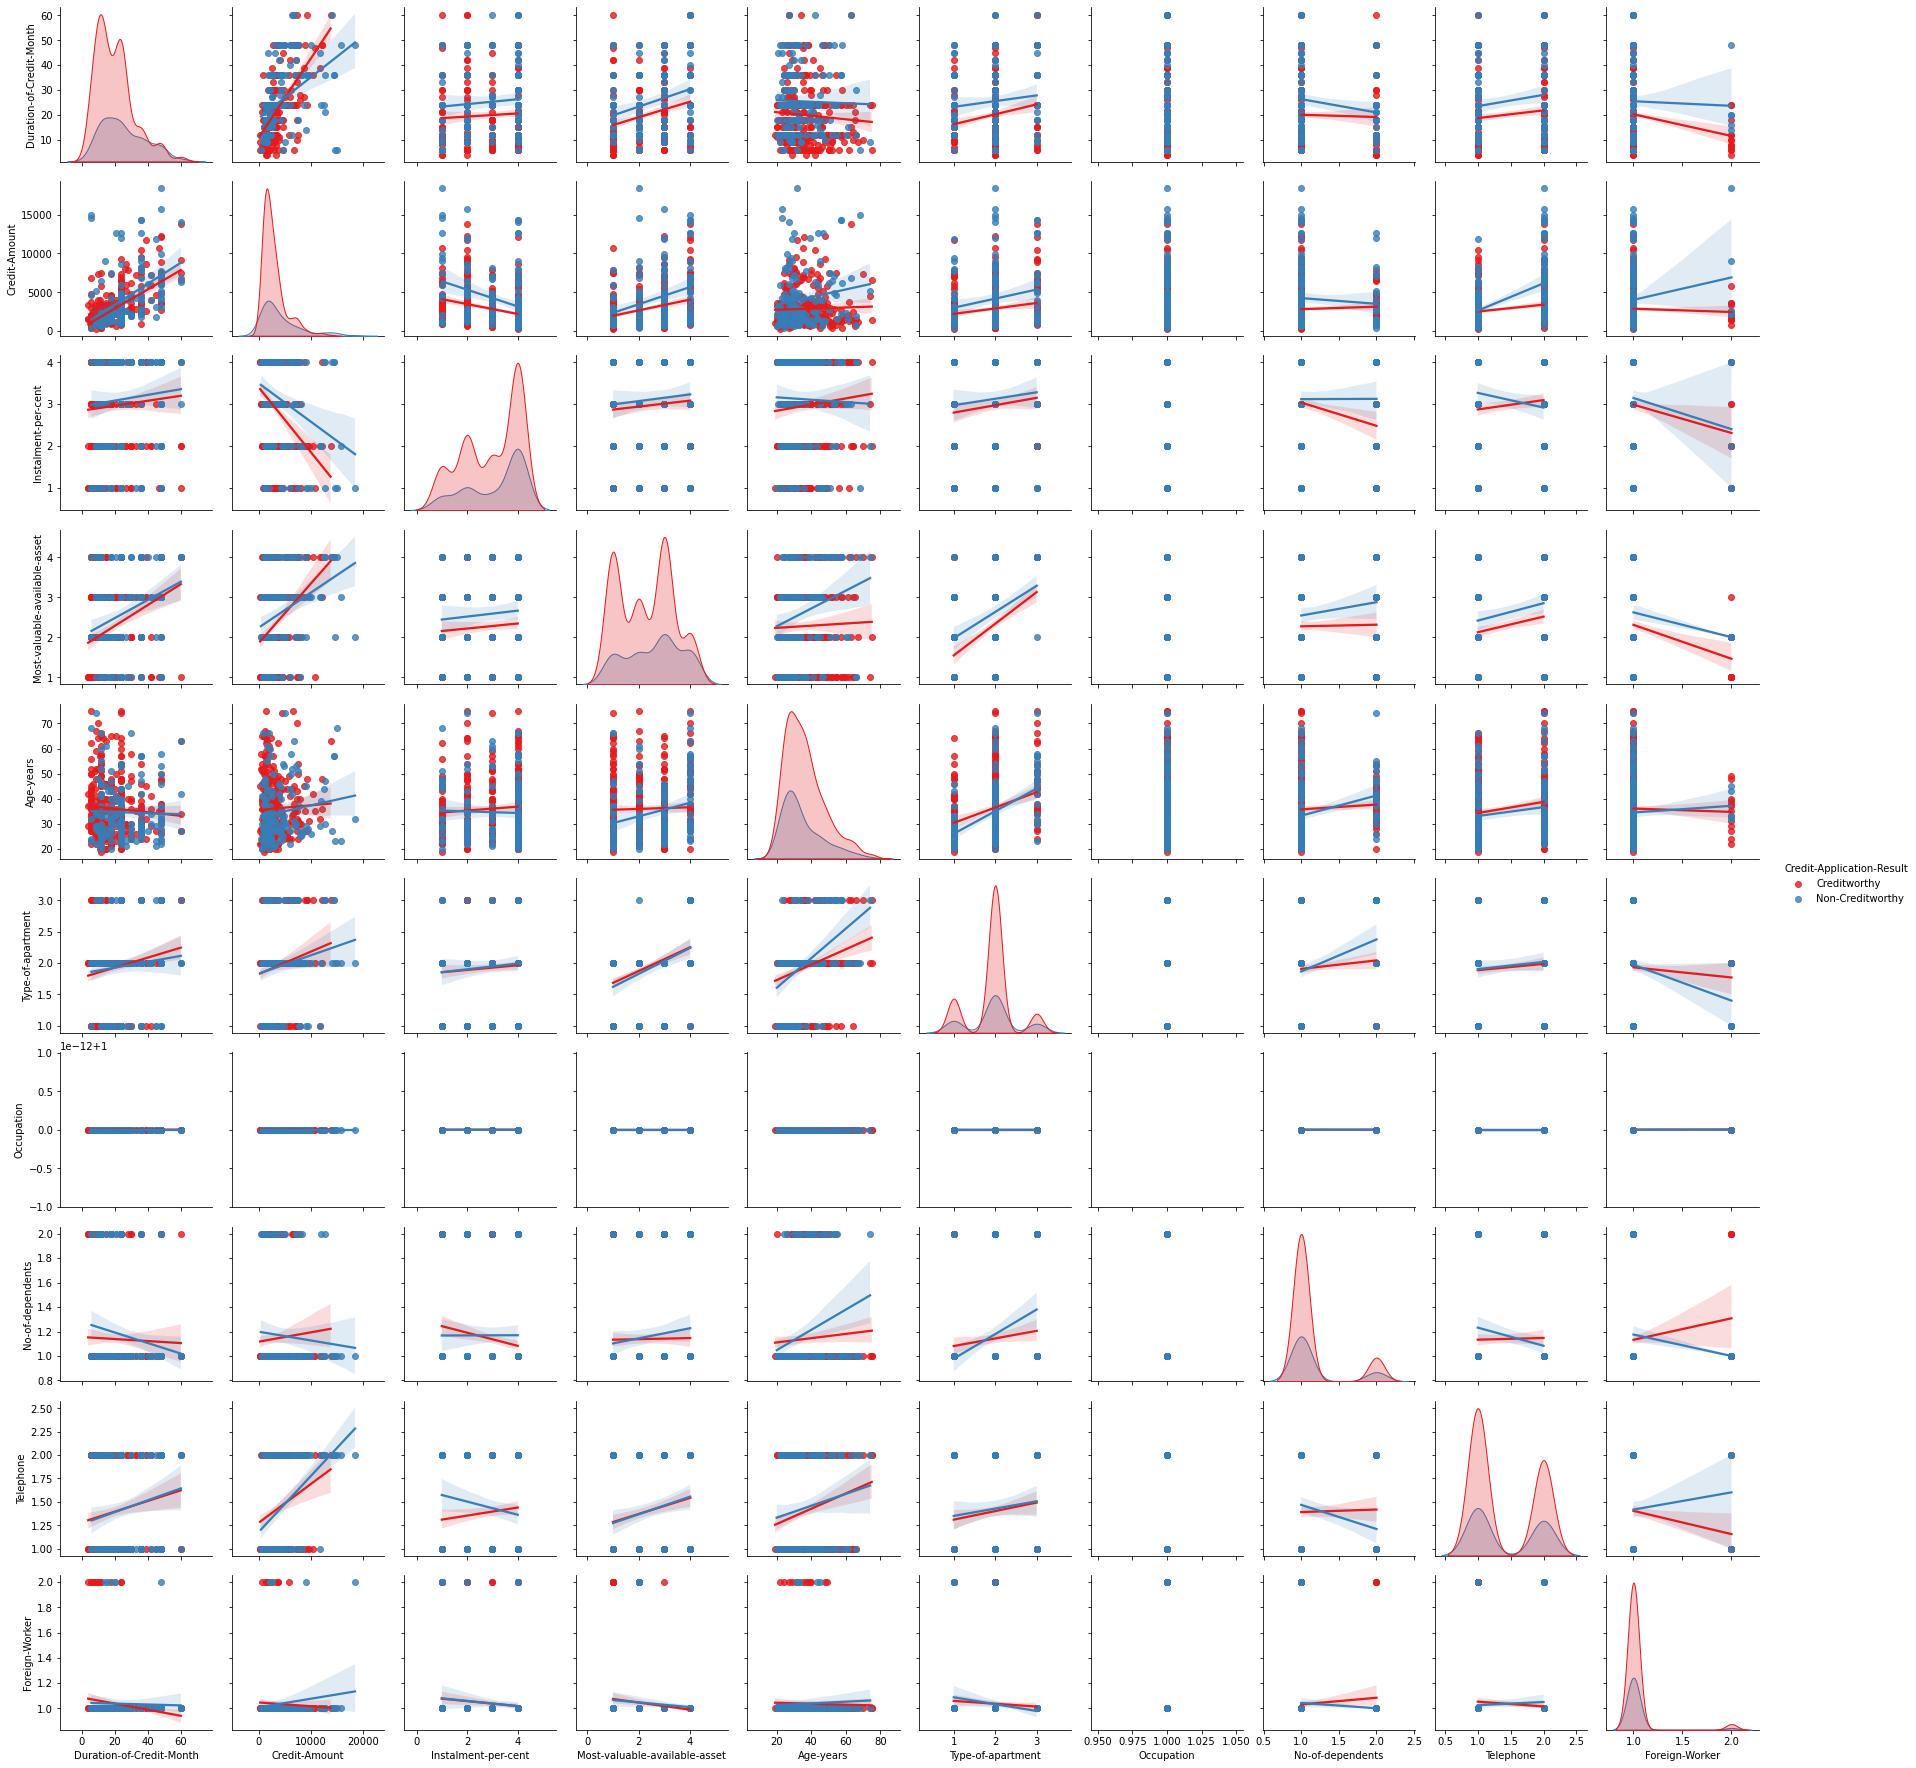

In [8]:
sns.pairplot(df_train, hue=target_name, palette='Set1', kind='reg')

In [9]:
df_train_dummy = pd.get_dummies(df_train)

In [10]:
df_train_dummy = df_train_dummy.drop(['Credit-Application-Result_Non-Creditworthy'], axis = 1)

In [11]:
df_train_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488 entries, 1 to 499
Data columns (total 31 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Duration-of-Credit-Month                                      488 non-null    int64  
 1   Credit-Amount                                                 488 non-null    int64  
 2   Instalment-per-cent                                           488 non-null    int64  
 3   Most-valuable-available-asset                                 488 non-null    int64  
 4   Age-years                                                     488 non-null    float64
 5   Type-of-apartment                                             488 non-null    int64  
 6   Occupation                                                    488 non-null    int64  
 7   No-of-dependents                                              488 non-n

In [12]:
from sklearn.feature_selection import SelectKBest

In [13]:
selection = SelectKBest(k = 5)

In [14]:
selection.fit(df_train_dummy.drop('Credit-Application-Result_Creditworthy', axis = 1), df_train_dummy['Credit-Application-Result_Creditworthy'])

/home/sergio/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [ 6 27] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
/home/sergio/anaconda3/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


SelectKBest(k=5)

In [15]:
len(selection.scores_)

30

In [17]:
features = df_train_dummy.drop('Credit-Application-Result_Creditworthy', axis = 1).columns

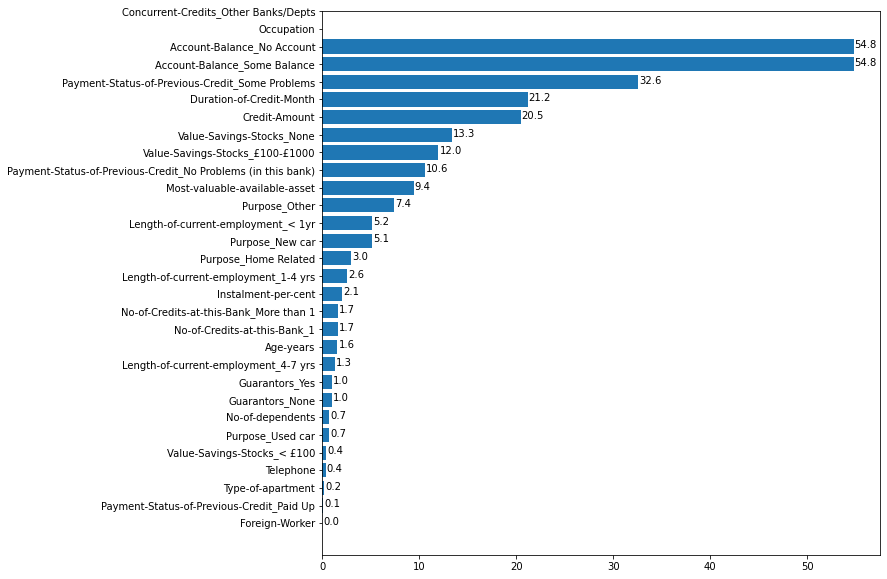

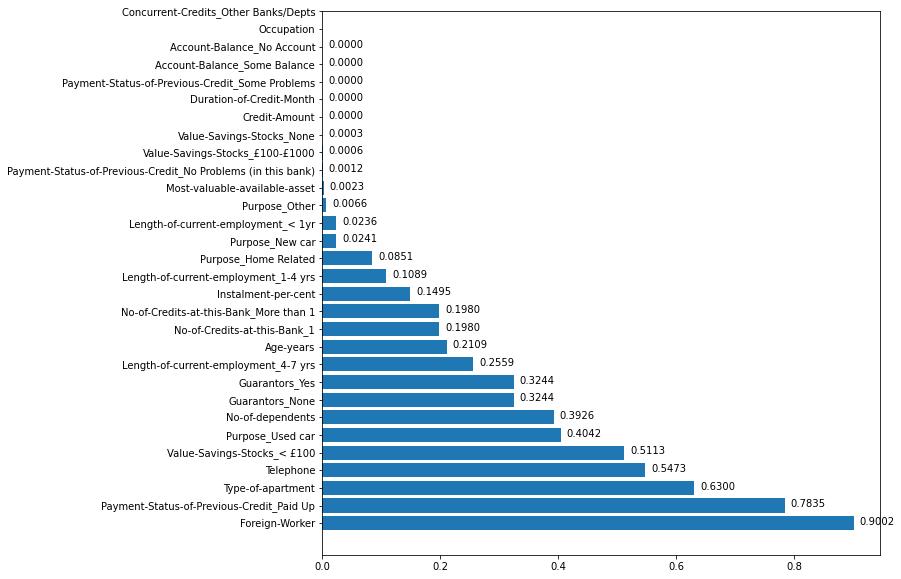

In [20]:
plt.figure(figsize = (10,10))
ax = plt.barh(np.arange(30),
             selection.scores_[selection.scores_.argsort()],
             tick_label = features[selection.scores_.argsort()])
for p in ax.patches:
    if ~np.isnan(p.get_width()):
        plt.text(x=p.get_width()+.1,
                 y=p.get_y()+.3,
                 s="%0.1f" % p.get_width())
plt.figure(figsize=(10,10))
ax = plt.barh(np.arange(30),
         selection.pvalues_[selection.scores_.argsort()],
         tick_label=features[selection.scores_.argsort()])
for p in ax.patches:
    if ~np.isnan(p.get_width()):
        plt.text(x=p.get_width()+.01,
                 y=p.get_y()+.3,
                 s="%0.4f" % p.get_width())